# <a href="https://miptstats.github.io/courses/ad_fivt.html">Введение в анализ данных</a>
## Домашнее задание 4. Нейронные сети.


**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds24_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*

**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографией в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив ее как файл боту вместе с ноутбуком *или*
    * вставив ее в ноутбук посредством `Edit -> Insert Image`;
  * в виде $LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). <font color="red"><b>Неправильно вставленные фотографии могут не передаться при отправке.</b></font> Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* В решениях поясняйте, чем вы пользуетесь, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.





**Баллы за задание:**

<b><font color="blue">Легкая часть</font></b> (достаточно на "хор"):
* Задача 1 &mdash; 60 баллов
* Задача 2 &mdash; 30 баллов

<b><font color="orange">Сложная часть</font></b> (необходимо на "отл"):
* Задача 3 &mdash; 60 баллов


In [2]:
# Bot check

# HW_ID: fpmi_ad4
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [3]:
import numpy as np
import scipy.stats as sps

import matplotlib.pyplot as plt
import seaborn as sns

import torch
from torch import nn

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as MSE

sns.set(font_scale=1.2, palette='Set2')
%matplotlib inline

Перед выполнением задания обязательно посмотрите <a href="https://miptstats.github.io/courses/ad_fivt/lecture4.pdf" target="_blank">презентацию</a> и <a href="https://miptstats.github.io/courses/ad_fivt/nn_simple_examples.html" target="_blank">обучающий ноутбук</a> с занятия по нейронным сетям.

---
### <font color="blue"><i>Легкая часть</i></font>

---
### Задача 1.

Рассмотрим двухслойную нейронную сеть, которая принимает на вход $x\in\mathbb{R}$ и возвращает $y\in\mathbb{R}$. Выход первого слоя возвращает $u \in\mathbb{R}^2$. После первого слоя используется функция активации $\sigma(x) = \frac{1}{1 + \exp(-x)}$, после второго слоя функция активации не используется (или используется тождественная). Тем самым нашу нейронную можно представить в виде

$$\widehat{y}(x) = \sum_{h=1}^2 w_{2h}u_h(x) + b_2,$$

$$u_h(x) = \sigma(w_{1h}x + b_{1h}),$$

$$\text{где} \; h \in \{1, 2\}.$$



**1.** Нарисуйте схематически данную нейронную сеть. Сколько у нее обучаемых параметров?

См. фото
7 обучаемых параметров

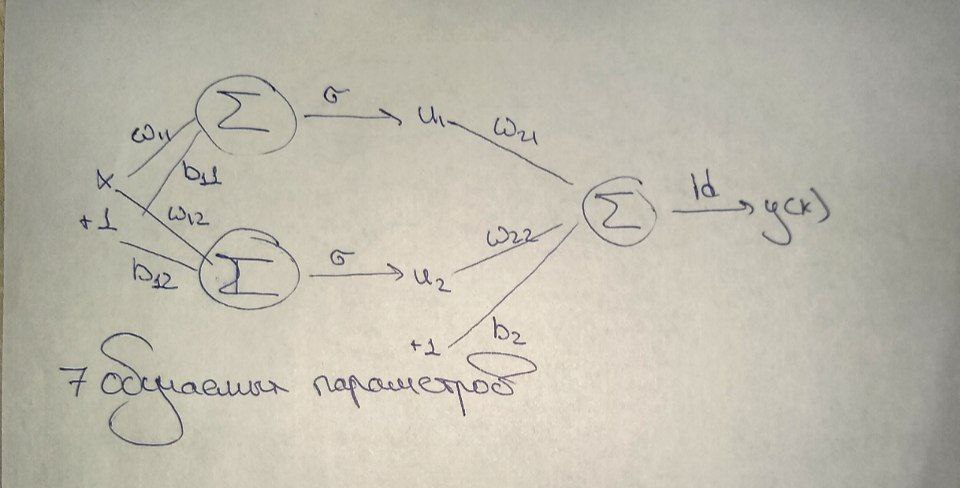

**2.** Пусть нам дана обучающая выборка $(X_1, Y_1), ..., (X_n, Y_n)$, где $X_i \in \mathbb{R}$ и $Y_i \in \mathbb{R}$. Нейронная сеть обучается по этой выборке, минимизируя заданную функцию $L$ &mdash; функцию ошибки. Положим, что $L$ &mdash; это MSE:
$$\text{MSE} = L(X, Y) = \frac{1}{n}\sum_{i=1}^n \big(Y_i - \widehat{y}(X_i)\big)^2.$$

Наша задача &mdash; найти оптимальные параметры нашей модели для минимизации $L(X, Y)$ на заданном наборе данных. Мы будем решать эту задачу с помощью градиентного спуска. Для этого нам понадобится выписать производные по всем параметрам сети. Конечно, в данном случае довольно просто выписать все производные напрямую. Однако мы воспользуемся следующей хитростью: мы будем считать производные поэтапно, причем начнем с конца вычислительной цепочки и, используя формулу производной сложной функции, последовательно посчитаем все необходимые производные. Этот процесс называется методом **обратного распространения ошибки (backpropagation)**.

**2.1.** Начнем с производной MSE по выходам сети
$$\frac{\partial\:\text{MSE}}{\partial \widehat{y}(X_i)} = \frac{2}{n}(\widehat{y}(X_i) - Y_i)$$

**2.2** Возьмем производные выходов сети по параметрам последнего слоя

$$\frac{\partial \widehat{y}(X_i)}{\partial w_{2h}} = u_h(X_i)$$

$$\frac{\partial \widehat{y}(X_i)}{\partial b_2} = 1$$

Также выпишем производные выходов сети по входам последнего слоя

$$\frac{\partial \widehat{y}(X_i)}{\partial u_h(X_i)} = w_{2h}$$

Теперь выпишем производные MSE по параметрам и входам последнего слоя. Для этого вспомните правило производной сложной функции из математического анализа. Обратите внимание на то, что нам не нужно прописывать все производные до конца, достаточно заполнить пропуски в записи ниже:

$$\frac{\partial\:\text{MSE}}{\partial w_{2h}} = \sum_{i=1}^n \frac{\partial\:\text{MSE}}{\partial \widehat{y}(X_i)} \frac{\partial \widehat{y}(X_i)}{\partial w_{2h}}$$

$$\frac{\partial\:\text{MSE}}{\partial b_2} = \sum_{i=1}^n \frac{\partial\:\text{MSE}}{\partial \widehat{y}(X_i)} \frac{\partial \widehat{y}(X_i)}{\partial b_2}$$

$$\frac{\partial\:\text{MSE}}{\partial u_h} = \sum_{i=1}^n \frac{\partial\:\text{MSE}}{\partial \widehat{y}(X_i)} \frac{\partial \widehat{y}(X_i)}{\partial u_h(X_i)}$$

**2.2.** Теперь будем разбираться с производными по параметрам первого слоя.

Для начала нам пригодится производная функции активации, запишите ее так, чтобы ответе осталась функция от $\sigma(x)$

$$\frac{\partial\:\sigma(x)}{\partial x} = \sigma(x) (1-\sigma(x))$$

Теперь возьмем производные выходов первого слоя по его параметрам

$$\frac{\partial u_h(X_i)}{\partial w_{1h}} = X_i \: \sigma(w_{1h}X_i + b_{1h}) (1 - \sigma(w_{1h}X_i + b_{1h}))$$

$$\frac{\partial u_h(X_i)}{\partial b_{1h}} = \sigma(w_{1h}X_i + b_{1h}) (1 - \sigma(w_{1h}X_i + b_{1h}))$$

Наконец, выпишем производные MSE по параметрам первого слоя. Так же как и раньше достаточно заполнить пропуски в записи ниже

$$\frac{\partial\:\text{MSE}}{\partial w_{1h}} = \; \sum_{i=1}^n \frac{\partial\:\text{MSE}}{\partial u_h(X_i)} \frac{\partial u_h(X_i)}{\partial w_{1h}}$$

$$\frac{\partial\:\text{MSE}}{\partial b_{1h}} = \; \sum_{i=1}^n \frac{\partial\:\text{MSE}}{\partial u_h(X_i)} \frac{\partial u_h(X_i)}{\partial b_{1h}}$$

 **3.** Пусть обучающая выборка очень большая. Что нужно делать в таком случае? Запишите, как нужно поменять правило обновления параметров.

Нужно использовать стохастический градиентный спуск:

$$ \theta_{t+1} = \theta_t - \eta \nabla ( \frac{1}{B} \sum_{b=1}^B \text{MSE}(\widehat{y}_{\theta_t}(X_{i_b}), Y_{i_b})) $$

Где $\theta_t$ - все параметры нейросети на шаге t, $y_{\theta_t}$ - функция предсказания на t-ом шаге, B - размер батча, $\eta$ - скорость обучения. Градиент берется по всем параметрам модели.

**Вывод:**
Подбирая параметры моделей при помощи метода обратного распространения ошибки даже для двухслойной сети приходится много раз суммировать и перемножать большое количество данных. В данном случае использование градиентного спуска без стохастического метода будет занимать очень большое время, поэтому следует использовать SGD.
Кроме сложностей в вычислениях связанных со временем, можно заметить сложность самого подсчета градиентов. Для подсчета градиентов MSE по каждому из параметров пришлось посчитать гораздо больше 7 производных, что говорит о необходимости автоматизации этого процесса.

---
### Задача 2.

Напишите нейронную сеть из задачи 1 с помощью библиотеки `pytorch`, используя Sequential-стиль. Перед выполнением задачи рекомендуется посмотреть <a href="https://miptstats.github.io/courses/ad_fivt/nn_simple_examples.html#3.-Готовые-модули-из-PyTorch" target="_blank">ноутбук</a> с занятия. Функция активации реализована как `torch.nn.Sigmoid`.

*Внимание.* Для выполнения задачи потребуется установить библиотеку `pytorch`. Альтернативный вариант &mdash; выполнение в <a href="https://colab.research.google.com" target="_blank">Google Colab</a>. Учитывайте, что при длительном бездействии Colab может сам завершить работу ядра.

In [4]:
model = nn.Sequential(
    nn.Linear(in_features=1, out_features=2),
    nn.Sigmoid(),
    nn.Linear(in_features=2, out_features=1)
)

model

Sequential(
  (0): Linear(in_features=1, out_features=2, bias=True)
  (1): Sigmoid()
  (2): Linear(in_features=2, out_features=1, bias=True)
)

Зададим начальные параметры модели.

In [5]:
for p in model.parameters():
    p.data = torch.rand([1]).reshape(-1, 1)

Создадим оптимизатор.

In [6]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
optim_func = nn.MSELoss()

Сгенерируем данные. Возьмите какую-либо нелинейную функцию $y(x)$.

В качестве $y(x)$ возьмем полином.

In [7]:
def func(X: np.ndarray) -> np.ndarray:
    return X ** 3 / 2 - X ** 2 + 4

Сгенерируем данные и разделим их на тренировочную и тестовую часть.

In [8]:
sample_size = int(1e5)
train_size = int(sample_size * 0.8)

X = sps.norm.rvs(size=(sample_size, 1))

X_train_np, X_test_np = X[:train_size], X[train_size:]
Y_train_np, Y_test_np = func(X_train_np), func(X_test_np)

Сразу приведем данные к нужному виду.

In [9]:
X_train = torch.tensor(X_train_np, dtype=torch.float32).reshape(-1, 1)
X_test = torch.tensor(X_test_np, dtype=torch.float32).reshape(-1, 1)
Y_train = torch.tensor(Y_train_np, dtype=torch.float32).reshape(-1, 1)
Y_test = torch.tensor(Y_test_np, dtype=torch.float32).reshape(-1, 1)

Обучите нейросеть на этих данных. Используйте код с занятия.

In [10]:
# Количество итераций
num_iter = 10000
loss = 0

for i in range(num_iter):
    # Forward pass
    Y_pred = model(X_train)

    # Вычисление оптимизируемой функции (MSE) по предсказаниям
    loss = optim_func(Y_pred, Y_train)

    # Backward pass
    loss.backward()

    # Оптимизация
    optimizer.step()

    # Зануление градиентов
    optimizer.zero_grad()

Визуализируйте предсказания и посчитайте MSE на тестовой части данных.

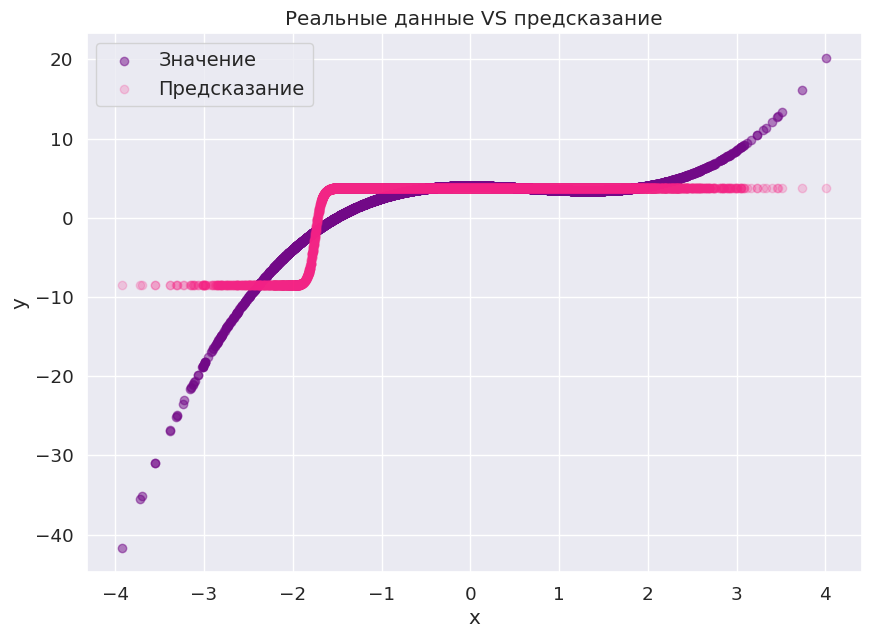

In [11]:
plt.figure(figsize=(10, 7))

plt.scatter(
    x=X_test,
    y=Y_test,
    alpha=0.5,
    color="#720987",
    label="Значение"
)

plt.scatter(
    x=X_test,
    y=model(Y_test).detach(),
    alpha=0.2,
    color="#F72585",
    label="Предсказание"
)

plt.xlabel("x")
plt.ylabel("y")
plt.title("Реальные данные VS предсказание")
plt.legend(fontsize=14)

plt.show()

Посмотрим на получившуюся метерику MSE.

In [12]:
print(f"MSE = {MSE(Y_test.detach().numpy(), model(X_test).detach().numpy()):.3f}")

MSE = 0.716


**Вывод:**
Используя нейросеть с всего 2 слоями и 7 параметрами получилось неплохо приблизить полиномиальную функцию. Используя pytorch нам удалось избежать сложных вычислений и больших временных затрат (библиотечные оптимизации). Достаточно было просто указать слои и функции активации. Также можно сделать вывод о поведении логистической сигмоиды: чем дальше данные от средних значений, тем хуже она их приближает.

---
### <font color="orange"><i>Сложная часть</i></font>

---
### Задача 3.

Теперь реализуйте класс нейронной сети из задачи 1 в стиле scikit-learn, например, см. <a href="https://miptstats.github.io/courses/ad_fivt/task3.html#Задача-4." target="_blank">шаблон класса задачи 4 из задания 3</a>. Предусмотрите возможность обучения по случайным батчам. При реализации можно использовать только библиотеку `numpy`.

In [14]:
class NN:
    def __init__(self, eta=0.01, batch_size=64, num_iter=10000):
        self.eta = eta
        self.batch_size = batch_size
        self.num_iter = num_iter
        
        self.coefficients = {
            "w11": np.random.random(),
            "w12": np.random.random(),
            "b11": np.random.random(),
            "b12": np.random.random(),
            "w21": np.random.random(),
            "w22": np.random.random(),
            "b2": np.random.random(),
        }
    
    def fit(self, X: np.ndarray, Y: np.ndarray):
        
        for j in range(num_iter):
            # Батч из равномерного распределения индексов
            batch = np.asarray(np.random.uniform(
                low = 0,
                high=X.shape[0] - 1,
                size=self.batch_size
            ).round(), dtype=np.int64)
        
            X_batch, Y_batch = X[batch], Y[batch]
            
            # Вектор градиентов
            gradients = {
                "w11": 0,
                "w12": 0,
                "b11": 0,
                "b12": 0,
                "w21": 0,
                "w22": 0,
                "b2": 0,
            }
            
            # Алгоритм из 1 задания
            dMSE_dy = (2 / self.batch_size) * (self.predict(X_batch) - Y_batch).T
            
            u1 = self.sigmoid(X_batch * self.coefficients["w11"] +
                              self.coefficients["b11"])
            u2 = self.sigmoid(X_batch * self.coefficients["w12"] +
                              self.coefficients["b12"])
            
            gradients["b2"] = np.sum(dMSE_dy)
            gradients["w21"] = dMSE_dy @ u1
            gradients["w22"] = dMSE_dy @ u2
            
            dMSE_du1 = dMSE_dy * self.coefficients["w21"]
            dMSE_du2 = dMSE_dy * self.coefficients["w22"]
            
            du1_db11 = u1 * (1 - u1)
            du2_db12 = u2 * (1 - u2)
            
            du1_dw11 = X_batch * du1_db11        
            du2_dw12 = X_batch * du2_db12
            
            gradients["b11"] = dMSE_du1 @ du1_db11
            gradients["b12"] = dMSE_du2 @ du2_db12
            
            gradients["w11"] = dMSE_du1 @ du1_dw11
            gradients["w12"] = dMSE_du2 @ du2_dw12
                
            # Обновляем коэффициенты, используя имеющиеся градиенты
            for p in self.coefficients.keys():
                self.coefficients[p] = self.coefficients[p] - self.eta * gradients[p]          
    
    def predict(self, x: np.ndarray) -> np.ndarray:
        return (
                self.coefficients["w21"] *
                self.sigmoid(x * self.coefficients["w11"] + self.coefficients["b11"]) +
                self.coefficients["w22"] *
                self.sigmoid(x * self.coefficients["w12"] + self.coefficients["b12"]) +
                self.coefficients["b2"]
        )
               
    @staticmethod
    def sigmoid(x: np.ndarray) -> np.ndarray:
        return np.exp(x) / (1 + np.exp(x))

Обучите нейронную сеть на рассмотренных ранее данных, а также простую линейную регрессию. Для линейной регрессии стоит взять реализацию из `sklearn`. Сравните эту нейросеть, линейную регрессию и pytorch-сеть из задачи 2.

Обучим кастомную нейронную сеть.

In [15]:
nn_model = NN()
nn_model.fit(X_train_np, Y_train_np)

Проделаем то же самое с библиотечной линейной регрессией.

In [16]:
regression_model = LinearRegression()
regression_model.fit(X_train_np, Y_train_np)

LinearRegression()

Пока что тяжело сравнить модели, не проверив их на практике, давайте посмотрим, как они справятся с предсказаниями.

Визуализируйте предсказания данных моделей и посчитайте MSE на тестовой части данных.

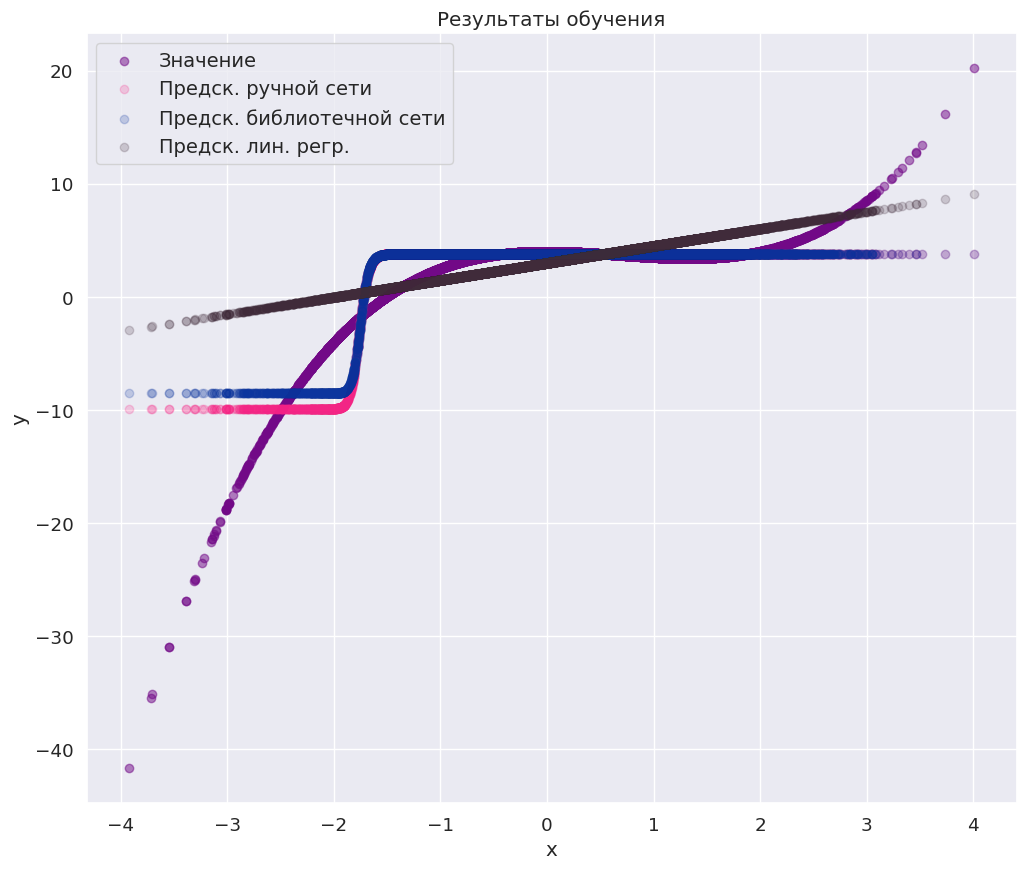

In [17]:
plt.figure(figsize=(12, 10))

plt.scatter(
    x=X_test_np,
    y=Y_test_np,
    alpha=0.5,
    color="#720987",
    label="Значение"
)

plt.scatter(
    x=X_test_np,
    y=nn_model.predict(Y_test_np),
    alpha=0.2,
    color="#F72585",
    label="Предск. ручной сети"
)

plt.scatter(
    x=X_test,
    y=model(Y_test).detach(),
    alpha=0.2,
    color="#0C359E",
    label="Предск. библиотечной сети"
)

plt.scatter(
    x=X_test_np,
    y=regression_model.predict(X_test_np),
    alpha=0.2,
    color="#402B3A",
    label="Предск. лин. регр."
)

plt.xlabel("x")
plt.ylabel("y")
plt.title("Результаты обучения")
plt.legend(fontsize=14)

plt.show()

In [18]:
print(f"MSE torch-сети = {MSE(Y_test.detach().numpy(), model(X_test).detach().numpy()):.3f}\n"
      f"MSE кастомной сети = {MSE(Y_test_np, nn_model.predict(X_test_np)):.3f}\n"
      f"MSE линейной регрессии = {MSE(Y_test_np, regression_model.predict(X_test_np)):.3f}\n")

MSE torch-сети = 0.716
MSE кастомной сети = 0.606
MSE линейной регрессии = 3.338


Теперь, сравнивая работу нейросети, написанной вручную и нейросети, написанной с использованием pytorch, можно уверенно сказать, что у нас получилось правильно реализовать модель. Предсказания практически полностью повторяют друг друга, что демонстрируют и показатели ошибок. Причем для нелинейной модели, сети показывают результат лучший, чем регрессия. Чтобы еще раз во всем этом убедиться, попробуем рассмотреть другую выборку для другой функции.

Повторите вычисления для другой нелинейной функции $y(x)$.

Рассмотрим более сложную функцию.

In [19]:
def other_func(X: np.ndarray) -> np.ndarray:
    return np.exp(X) + X ** 2 + 4 * np.sin(X)

Генерация и подготовка данных

In [20]:
X = sps.norm.rvs(size=(sample_size, 1))

X_train_np, X_test_np = X[:train_size], X[train_size:]
Y_train_np, Y_test_np = other_func(X_train_np), other_func(X_test_np)

X_train = torch.tensor(X_train_np, dtype=torch.float32).reshape(-1, 1)
X_test = torch.tensor(X_test_np, dtype=torch.float32).reshape(-1, 1)
Y_train = torch.tensor(Y_train_np, dtype=torch.float32).reshape(-1, 1)
Y_test = torch.tensor(Y_test_np, dtype=torch.float32).reshape(-1, 1)

Обучение моделей.
Для библиотечной сети сбросим параметры и повторим SGD.

In [21]:
for p in model.parameters():
    p.data = torch.rand([1]).reshape(-1, 1)

# Количество итераций
num_iter = 10000
loss = 0

for i in range(num_iter):
    Y_pred = model(X_train)
    
    loss = optim_func(Y_pred, Y_train)
    loss.backward()
    
    optimizer.step()
    optimizer.zero_grad()

Для других моделей достаточно выполнить метод fit, SGD реализован уже внутри.

In [22]:
nn_model.fit(X_train_np, Y_train_np)
regression_model.fit(X_train_np, Y_train_np)

LinearRegression()

Визуализируем результат предсказаний.

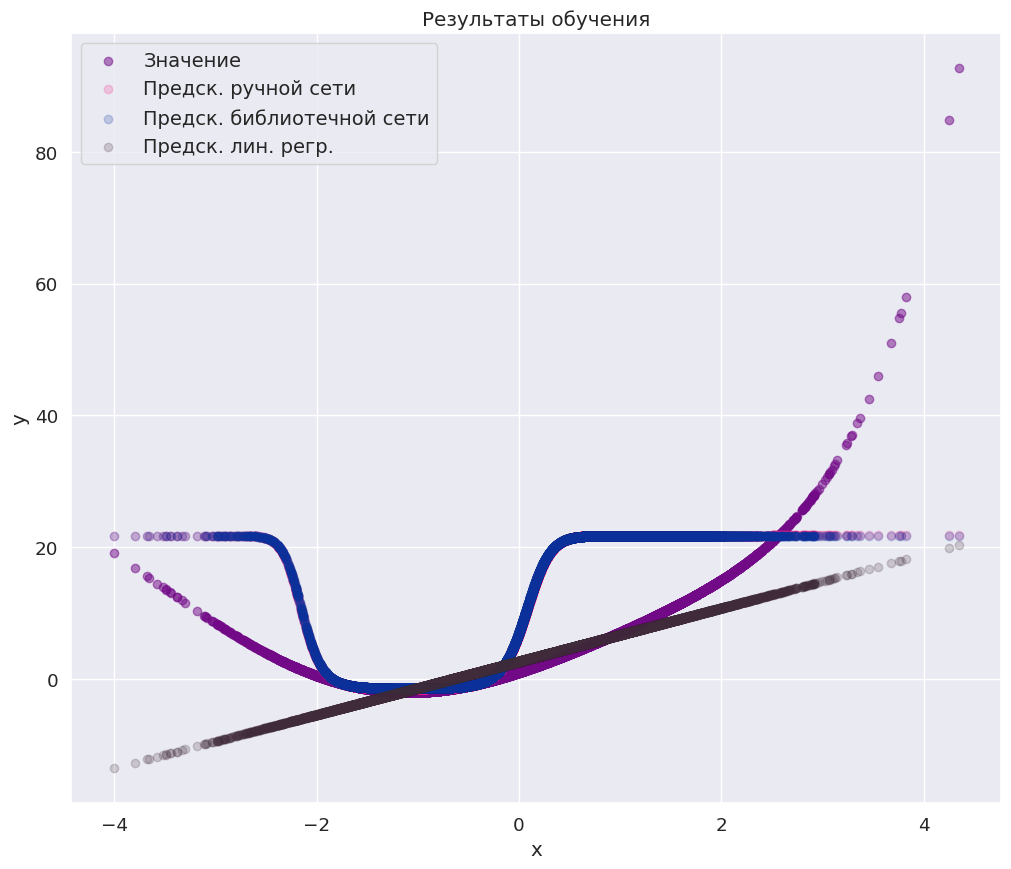

In [23]:
plt.figure(figsize=(12, 10))

plt.scatter(
    x=X_test_np,
    y=Y_test_np,
    alpha=0.5,
    color="#720987",
    label="Значение"
)

plt.scatter(
    x=X_test_np,
    y=nn_model.predict(Y_test_np),
    alpha=0.2,
    color="#F72585",
    label="Предск. ручной сети"
)

plt.scatter(
    x=X_test,
    y=model(Y_test).detach(),
    alpha=0.2,
    color="#0C359E",
    label="Предск. библиотечной сети"
)

plt.scatter(
    x=X_test_np,
    y=regression_model.predict(X_test_np),
    alpha=0.2,
    color="#402B3A",
    label="Предск. лин. регр."
)

plt.xlabel("x")
plt.ylabel("y")
plt.title("Результаты обучения")
plt.legend(fontsize=14)

plt.show()

Наконец, посмотрим на ошибки.

In [24]:
print(f"MSE torch-сети = {MSE(Y_test.detach().numpy(), model(X_test).detach().numpy()):.3f}\n"
      f"MSE кастомной сети = {MSE(Y_test_np, nn_model.predict(X_test_np)):.3f}\n"
      f"MSE линейной регрессии = {MSE(Y_test_np, regression_model.predict(X_test_np)):.3f}\n")

MSE torch-сети = 1.983
MSE кастомной сети = 1.986
MSE линейной регрессии = 7.108


**Вывод:**
Проанализировав результаты обучения трех моделей на двух функциях можно сделать некоторые выводы.

Во-первых, показатели ошибок и вид графиков очевидно демонстрирует преимущества нейросетей над линейными регрессиями: появляется возможность не просто двигать и поворачивать функцию приближения, но и совершать над ней другие преобразования.
Во-вторых, в процессе обучения моделей, стало заметно, насколько усложнились вычисления параметров сетей по сравнению с вычислением коэффициентов линейной регрессии. Если регрессия обучилась мгновенно, то библиотечная и кастомная нейронная сеть делали это несколько секунд.

Таким образом, для того чтобы лучше приближать исследуемые данные, приходится использовать более продвинутые инструменты и методы обучения, а также усложнять модели, что неизбежно ведет к замедлению процесса обучения. Большое количество идей уже было реализовано в библиотеках (pytorch, sklearn), но чтобы применить их на практике, следует анализировать данные и на их основе проектировать модели.